<a href="https://colab.research.google.com/github/HYLee810/projectmanager/blob/main/%EB%82%98%EB%85%B8%EA%B5%AC%EC%A1%B0%EA%B4%80%EB%A0%A8_%ED%8A%B9%ED%97%88_%EB%B9%88%EB%8F%84%EB%8B%A8%EC%96%B4_%EB%B0%8F_%EC%9C%A0%EC%82%AC%EB%8B%A8%EC%96%B4_%ED%99%95%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 빈도수 확인

In [18]:
!pip install kiwipiepy

In [29]:
import pandas as pd
df = pd.read_excel('./sample_data/patents.xlsx')
df.head()

,Unnamed: 0,No.,국가코드,"명칭, 요약, 독립항",abstract1,abstract,출원일,발명자,문헌종류 코드,등록번호,...,폴더명,유사도,과제고유번호,부처명,연구관리전문기관,연구사업명,연구과제명,주관기관,연구시작일,연구종료일
0,초친수 증착,3,CN,A stable preparation method for photocatalytic...,The present invention relates to a stable inor...,[청구항1]\n1. A stable preparation method for ino...,2022.12.29,汤永康 | 苏文静 | 鲍田 | 李刚 | 甘治平,A,-,...,-,-,-,-,-,-,-,-,-,-
1,초발수 코팅 제조방법 응용,4,CN,"Super-hydrophobic coating, self-cleaning coati...",The invention provides a super-hydrophobic coa...,"[청구항1]\n1. A superhydrophobic coating, wherein...",2022.11.14,YANG YU | CHANG GUOHUA | LI CHENGGANG | WANG J...,A,-,...,-,-,-,-,-,-,-,-,-,-
2,소수 박막 패키징,7,CN,Hydrophobic anti-reflection barrier film for p...,The invention belongs to the technical field o...,[청구항1]\n1. A hydrophobic anti-permeability bar...,2022.08.05,YUAN NINGYI | WANG KAIFENG | FEI FEI | WANG SHUBO,A,-,...,-,-,-,-,-,-,-,-,-,-
3,초친수 코팅층,9,CN,Photovoltaic glass self-cleaning nano coating ...,The invention provides a photovoltaic glass se...,[청구항1]\n1. A kind of photovoltaic glass self-c...,2022.04.19,LIU RUITING,A,-,...,-,-,-,-,-,-,-,-,-,-
4,초발수 코팅,12,CN,"Super-hydrophobic glaze layer, inorganic ceram...",The invention belongs to the field of surface ...,[청구항1]\n1. A method for preparing a superhydro...,2021.11.22,LI JIANLIN | XIE SHENGLIANG | MIAO YIMIN,A,-,...,-,-,-,-,-,-,-,-,-,-


In [30]:
import kiwipiepy
kiwi = kiwipiepy.Kiwi()
def extract_nouns(text):
  for token in kiwi.tokenize(text):
    if token.tag in {'NNG', 'NNP'}:
       yield token.form # 형태소 분석

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(tokenizer=extract_nouns, min_df=10)
df['abstract'] = df['abstract'].fillna('')  # NaN 값을 빈 문자열로 대체
dtm = cv.fit_transform(df.abstract)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [32]:
word_count = pd.DataFrame({
    'word': cv.get_feature_names_out(), # 각 단어별 빈도수
    'count': dtm.sum(axis=0).flat # 각 문서에서 나온 빈도수 합하라
})

In [33]:
word_count.sort_values('count', ascending=False).head(20)

,word,count
34,항,348
28,청구,324
16,상기,283
35,형성,134
33,표면,134
5,단계,113
32,포함,103
14,부,92
3,기판,82
4,나노,78


In [ ]:
# 단어별 유사도 계산

In [34]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3, random_state=1234) # LSA(토픽모델링 방법) -> SVD(수학적 방법)
doc_emb = svd.fit_transform(dtm)

In [35]:
import numpy as np
from sklearn.metrics.pairwise import cosine_distances
doc_id = 0
sims = cosine_distances(doc_emb[[doc_id]], doc_emb).flatten() # 유사도 계산
sim_idx = np.argsort(sims)[:10] # 비슷한 순으로 정렬해서 가장 비슷한 것 10개

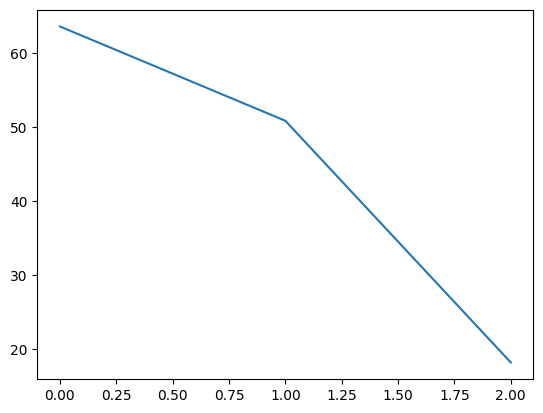

In [36]:
import matplotlib.pyplot as plt
plt.plot(svd.explained_variance_)


In [37]:
sim_idx

array([38, 59, 42, 90, 13, 77,  0, 33, 67, 83])

In [38]:
df.iloc[sim_idx]

,Unnamed: 0,No.,국가코드,"명칭, 요약, 독립항",abstract1,abstract,출원일,발명자,문헌종류 코드,등록번호,...,폴더명,유사도,과제고유번호,부처명,연구관리전문기관,연구사업명,연구과제명,주관기관,연구시작일,연구종료일
38,초소수 제조 응용,74,CN,Transparent super-hydrophobic film and prepara...,The invention relates to a transparent super-h...,[청구항1]\n1. A transparent super-hydrophobic thi...,2017.02.03,YAN LANQIN | CHU WEIGUO | XU LIHUA | SONG ZHIWEI,A,106835043,...,-,-,-,-,-,-,-,-,-,-
59,초소수 제조,102,CN,Polyvinylidene fluoride super-hydrophobic self...,The invention relates to a preparation method ...,[청구항1]\n1. A polyvinylidene fluoride super-hyd...,2014.01.14,LI XIANFENG | ZHOU CHONG | XIAO CHANGFA,A,-,...,-,-,-,-,-,-,-,-,-,-
42,소수 친수 구조,81,CN,Nano dustproof self-cleaning surface layer str...,The invention discloses a nano dustproof self-...,[청구항1]\n1. Nano-dust-proof self-cleaning struc...,2016.06.16,YANG DEQUAN,A,-,...,-,-,-,-,-,-,-,-,-,-
90,소수 제조,151,EP,Diffusely reflecting surface and process for m...,Die vorliegende Erfindung betrifft oberflächen...,[청구항1]\nDiffuse-reflection surfaces based on a...,2002.11.14,"Nun, Edwin, Dr. | Oles, Markus, Dr. | Schleich...",B1,1317967,...,-,-,-,-,-,-,-,-,-,-
13,소수 코팅,36,CN,Wear-resistant self-cleaning super-amphiphobic...,The invention provides a wear-resistant self-c...,[청구항1]\n1.The wear-resistant self-cleaning sup...,2020.11.18,KANG YIHONG | YU XUEFENG | WU LIE | CHENG WENJ...,A,112375244,...,-,-,-,-,-,-,-,-,-,-
77,소수 제조,129,CN,Nano-structured surface and in situ forming me...,The patent refers to the field of 'nano-struct...,"[청구항1]\n1, a nano-structured surface, characte...",2009.07.13,XIN JOHN HAOZHONG | LIU YU YANG | LU HAI FENG ...,A,101628706,...,-,-,-,-,-,-,-,-,-,-
0,초친수 증착,3,CN,A stable preparation method for photocatalytic...,The present invention relates to a stable inor...,[청구항1]\n1. A stable preparation method for ino...,2022.12.29,汤永康 | 苏文静 | 鲍田 | 李刚 | 甘治平,A,-,...,-,-,-,-,-,-,-,-,-,-
33,초소수 응용,67,CN,Pollen collection device for pomelo,The invention discloses a pollen collection de...,[청구항1]\n1. A Shaddock pollen collection device...,2017.09.29,WU JIANLIANG,A,-,...,-,-,-,-,-,-,-,-,-,-
67,소수 응용,113,CN,Optical film and method for producing the same,The invention relates to an optical film and a...,[청구항1]\n1. Preparation method of an optical fi...,2012.03.14,许嘉麟,B,103308960,...,-,-,-,-,-,-,-,-,-,-
83,소수 제조,135,CN,Optical film,The patent refers to the field of 'optical ele...,"[청구항1]\n1. A nano-structure, includes a plural...",2008.06.27,SIMON WALKER NICHOLAS,A,-,...,-,-,-,-,-,-,-,-,-,-


In [ ]:
# 유사도에서 아래와 같은 단어를 찾았다는 가정하에 chatGPT에 투자계획서 작성 요청

윤활유: 리튬을 함유한 리튬 그리스는 자동차 및 산업용 기계의 윤활유로 사용됩니다. 이는 부품의 마모를 줄이고 기계의 수명을 연장하는 데 도움을 줍니다.

의약품: 리튬은 조울증과 같은 정신 질환의 치료에 사용됩니다. 리튬 치료는 정신 안정제로 사용되며 환자의 기분 조절을 개선하는 데 도움을 줄 수 있습니다.

합금 및 금속 가공: 리튬은 알루미늄 합금 제조에 사용됩니다. 이러한 합금은 항공기 및 자동차 부품과 같은 경량 구조물을 만드는 데 사용됩니다.

유리 및 세라믹 제조: 리튬 카보네이트와 리튬 옥사이드는 유리 및 세라믹 제조에 사용됩니다. 이러한 물질은 유리의 내구성을 향상시키고 화학 반응을 조절하는 데 도움을 줍니다.

열파이프: 리튬은 열전도성이 높아 열파이프의 제조에 사용됩니다. 이러한 열파이프는 고온 환경에서 열을 전도하는 데 사용됩니다.

기후 제어 시스템: 리튬 브로마이드는 공기 조화 시스템의 냉매로 사용됩니다. 이러한 물질은 공기를 냉각하고 습도를 제어하는 데 도움을 줍니다.

화약 및 폭약: 일부 화약 및 폭약 제품에 리튬이 사용됩니다. 이러한 화약 및 폭약은 군사 및 산업용으로 사용됩니다.

핵 에너지: 리튬은 핵 에너지 생산에 사용되는 물질 중 하나로, 핵 반응 제어 장치에서 중요한 역할을 합니다.